In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import matplotlib.dates as mdates
from sklearn.cluster import KMeans
import datetime
from datetime import date, timedelta
from fbprophet import Prophet
from datetime import datetime

In [2]:
df=pd.read_csv("covid19_italy_region.csv", parse_dates=True)
an_data = pd.read_csv("COVID19_open_line_list.csv", parse_dates=True)

In [3]:
df.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2,2020-02-24 18:00:00,ITA,4,Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


In [4]:
an_data.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
an_data = an_data[an_data['country']=='Italy']

In [6]:
an_data.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
3197,3226.0,NaN,male,Rome,Lazio,Italy,1.0,41.88333,12.500000,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3198,3227.0,NaN,female,Rome,Lazio,Italy,1.0,41.88333,12.500000,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10374,10674.0,29,male,"Luzzara, Reggio Emilia",Emilia-Romagna,Italy,1.0,44.95971,10.689220,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11206,11512.0,38,male,Codogno,Lombardia,Italy,1.0,45.16110,9.701432,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11207,11513.0,NaN,female,Codogno,Lombardia,Italy,1.0,45.16110,9.701432,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/zander/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/Users/zander/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less



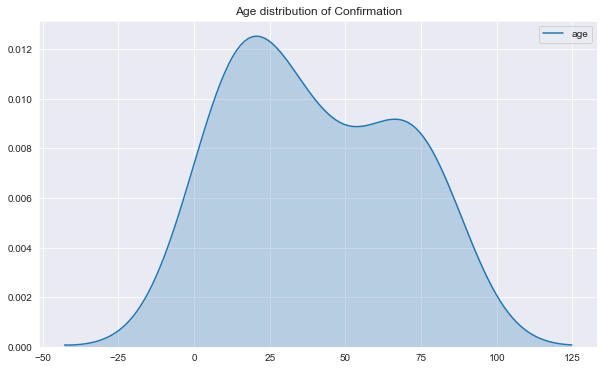

In [7]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of Confirmation")
sns.kdeplot(data=an_data['age'], shade=True)

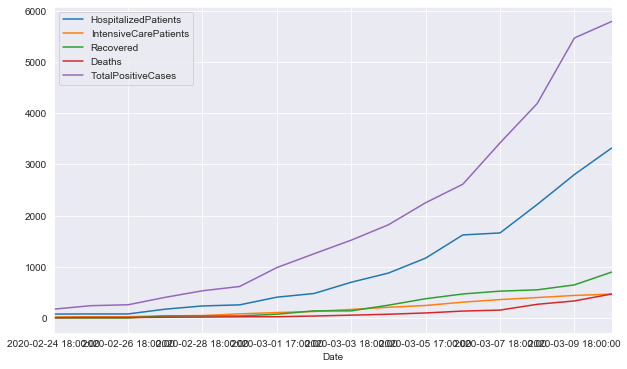

In [8]:
df[df['RegionName']=='Lombardia'].groupby('Date')[['HospitalizedPatients','IntensiveCarePatients','Recovered','Deaths','TotalPositiveCases']].sum().plot(figsize=(10,6))
   

## 

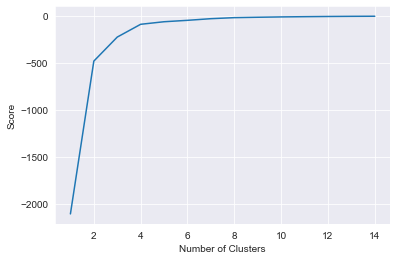

In [9]:
K_clusters = range(1,15)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 6, init ='k-means++')
kmeans.fit(df[df.columns[5:7]])
df['cluster_label'] = kmeans.fit_predict(df[df.columns[5:7]])
centers = kmeans.cluster_centers_
labels = kmeans.predict(df[df.columns[5:7]])

In [11]:
df['region_centerpoint'] = df['cluster_label'].apply(lambda x: centers[x])

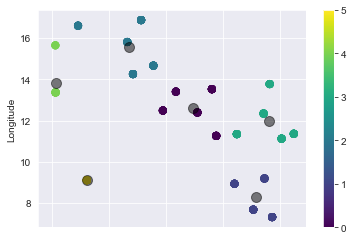

In [12]:
df.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

In [13]:
import folium
italy_map = folium.Map(location=[42.8719,12.5674 ], zoom_start=5,tiles='Stamen Toner')

for region_centerpoint,cluster_label,TotalPositiveCases,Recovered,Deaths,TotalHospitalizedPatients in zip(df['region_centerpoint'],df['cluster_label'],df['TotalPositiveCases'],df['Recovered'],df['Deaths'],df['TotalHospitalizedPatients']):
    folium.CircleMarker(region_centerpoint,
                        radius=5,
                        color='red',
                      popup =('cluster_label: ' + str(cluster_label) + '<br>'
                    'TotalPositiveCases: ' + str(TotalPositiveCases) + '<br>'
                    'TotalHospitalizedPatients: ' + str(TotalHospitalizedPatients) + '<br>'
                      'Recovered: ' + str(Recovered) + '<br>'
                      'Deaths: ' + str(Deaths) + '<br>'),

                        fill_color='red',
                        fill_opacity=0.7 ).add_to(italy_map)
italy_map

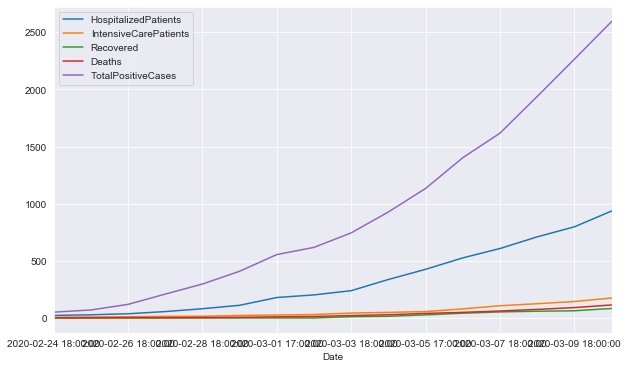

In [14]:
clustered_df = df[df['cluster_label'] == 3].groupby('Date')[['HospitalizedPatients','IntensiveCarePatients','Recovered','Deaths','TotalPositiveCases']].sum()
clustered_df.plot(figsize=(10,6))

## Modeling the growth of a region

There are a lot of variables that affect the spread of a virus in a population. To simplify this, we will use a saturation rate for our population and try to model the growth of italy using the common prophet forecasting package.

We will set our growth rate cap at 60% of our regional population. And to simplify the analysis we will use the regions so that we can more easily get the population of the region.

In [15]:
clustered_df['y'] = clustered_df['TotalPositiveCases'].astype(int)
clustered_df['ds'] = clustered_df.index
clustered_df['ds'] = clustered_df['ds'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())

In [21]:
clustered_df

,HospitalizedPatients,IntensiveCarePatients,Recovered,Deaths,TotalPositiveCases,y,ds
Date,,,,,,,
2020-02-24 18:00:00,22,6,0,1,51,51,2020-02-24
2020-02-25 18:00:00,28,9,0,1,70,70,2020-02-25
2020-02-26 18:00:00,37,11,0,3,119,119,2020-02-26
2020-02-27 18:00:00,56,14,0,3,209,209,2020-02-27
2020-02-28 18:00:00,81,15,0,4,297,297,2020-02-28
2020-02-29 17:00:00,111,22,0,6,409,409,2020-02-29
2020-03-01 17:00:00,179,26,0,10,555,555,2020-03-01
2020-03-02 18:00:00,202,30,0,13,618,618,2020-03-02
2020-03-03 18:00:00,239,43,11,21,745,745,2020-03-03


In [17]:
population_lombardy = 10000000
saturation_coeff = .4 # estimated possible population saturation
density_coeff=.3 # 1/3 of wuhan

In [18]:
prophet_df = clustered_df[['ds','y']].copy()
prophet_df['cap'] = population_lombardy * saturation_coeff * density_coeff
m = Prophet(interval_width=0.95, growth='logistic')
m.fit(prophet_df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


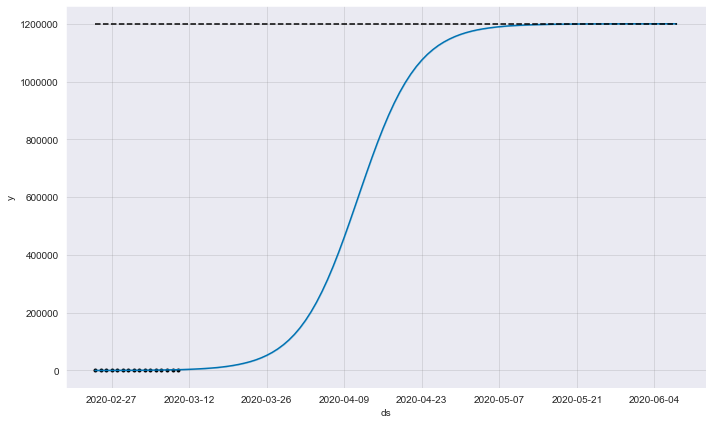

In [19]:
future = m.make_future_dataframe(periods=90)
future['cap'] = population_lombardy * saturation_coeff * density_coeff
fcst = m.predict(future)
fig = m.plot(fcst)

# Using the SIR model to determine growth

recovery rate gamma = 1/21

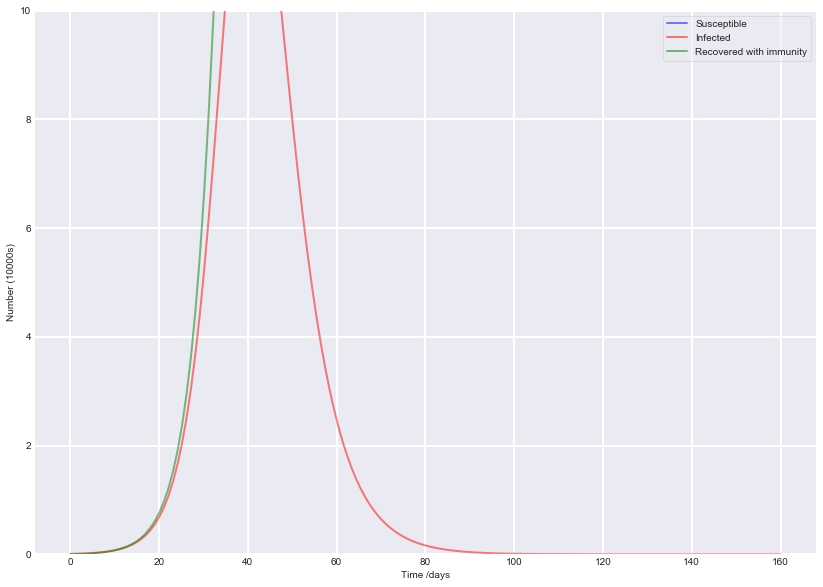

In [33]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 78, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.475, 1/4 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize= (14,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/10000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/10000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/10000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (10000s)')
ax.set_ylim(0,10)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [34]:
I[16]

2885.3437953239813